In [1]:
#There are two components to running a Monte Carlo simulations:
#the equation to evaluate
#the random variables for the input

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')

**Predict the Bitcoin Price**

In [3]:
#Determine the Bitcoin price voltility,120 days historical voltility 3.32%,number of simulation equals to 1000
avg = 9337.74
std_dtv =310.013
num_reps = 166
num_simulations = 1000

In [4]:
btc_price= np.random.normal(avg,std_dtv,num_reps).round(2)

In [5]:
btc_price[0:166]
print(len(btc_price))

166


**Predict the mining output**

In [6]:
daily_output_summary = []
daily_output=0.00001938

for day in range(166):
    if day == 4:
        daily_output  = daily_output * 1.0313
    if (day - 4) % 14 == 0 and day - 4 != 0:
        daily_output = daily_output * 0.96
    daily_output_summary.append(daily_output)

In [7]:
Daily_output_btc=daily_output_summary
print(len(Daily_output_btc))

166


In [8]:
#show the last day's output
Daily_output_btc[165]

1.2756230374571436e-05

**Calculate the mining revenu and Cloud Mining Contract Price**

In [9]:
df = pd.DataFrame(index=range(num_reps),data={'Btc_price':btc_price,
                                             'Daily_output':Daily_output_btc})
df['Revenu']=df['Btc_price']*df['Daily_output']

In [10]:
Revenu = df['Btc_price']*df['Daily_output']

In [11]:
df['Daily_output'].round(10)

0      0.000019
1      0.000019
2      0.000019
3      0.000019
4      0.000020
5      0.000020
6      0.000020
7      0.000020
8      0.000020
9      0.000020
10     0.000020
11     0.000020
12     0.000020
13     0.000020
14     0.000020
15     0.000020
16     0.000020
17     0.000020
18     0.000019
19     0.000019
20     0.000019
21     0.000019
22     0.000019
23     0.000019
24     0.000019
25     0.000019
26     0.000019
27     0.000019
28     0.000019
29     0.000019
         ...   
136    0.000014
137    0.000014
138    0.000014
139    0.000014
140    0.000014
141    0.000014
142    0.000014
143    0.000014
144    0.000013
145    0.000013
146    0.000013
147    0.000013
148    0.000013
149    0.000013
150    0.000013
151    0.000013
152    0.000013
153    0.000013
154    0.000013
155    0.000013
156    0.000013
157    0.000013
158    0.000013
159    0.000013
160    0.000013
161    0.000013
162    0.000013
163    0.000013
164    0.000013
165    0.000013
Name: Daily_output, Leng

In [12]:
#Cloud mining pricing
cloud_price = df['Revenu']*300
df = pd.DataFrame(index=range(num_reps),data={'Btc_price':btc_price,
                                             'Daily_output':daily_output_summary,
                                              'Revenue':Revenu,
                                             'Cloud_price':cloud_price})

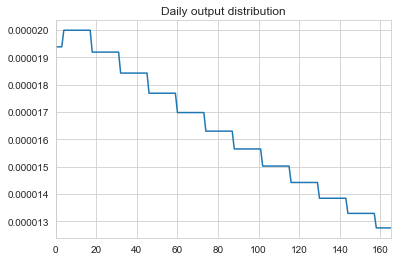

In [13]:
df['Daily_output'].plot(kind='line',title='Daily output distribution')

In [14]:
df.head().round(8)

,Btc_price,Daily_output,Revenue,Cloud_price
0,9361.84,0.000019,0.181432,54.429738
1,9317.56,0.000019,0.180574,54.172294
2,8986.71,0.000019,0.174162,52.248732
3,9219.18,0.000019,0.178668,53.600313
4,9758.21,0.000020,0.195033,58.510014


In [15]:
df.tail()

,Btc_price,Daily_output,Revenue,Cloud_price
161,9134.68,0.000013,0.116524,34.957225
162,9022.42,0.000013,0.115092,34.527620
163,8845.72,0.000013,0.112838,33.851413
164,9332.29,0.000013,0.119045,35.713452
165,9464.39,0.000013,0.120730,36.218982


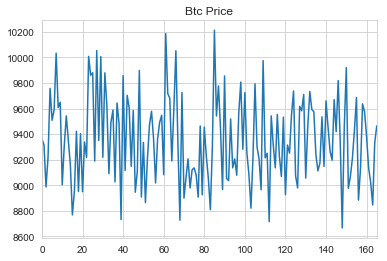

In [16]:
df['Btc_price'].plot(kind='line',title='Btc Price')

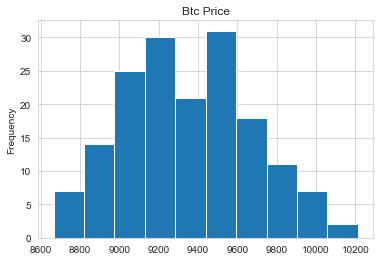

In [17]:
df['Btc_price'].plot(kind='hist',title='Btc Price')

**Calculate the reimbursement**

In [18]:
#Locked period is 120 days, the reimbusement starts the day 121
reimbursement_s = []

for day in range(166):
    if day <= 120:
        reimbursement  = 0
    if day> 120:
        reimbursement = cloud_price[day-120]*0.5

    reimbursement_s.append(reimbursement)

In [19]:
df = pd.DataFrame(index=range(num_reps),data={'Btc_price':btc_price,
                                             'Daily_output':daily_output_summary,
                                              'Revenue':Revenu,
                                             'Cloud_price':cloud_price,
                                             'reimbursement':reimbursement_s})

In [20]:
df[1:122:120]

,Btc_price,Daily_output,Revenue,Cloud_price,reimbursement
1,9317.56,0.000019,0.180574,54.172294,0.000000
121,9314.67,0.000014,0.134300,40.290011,27.086147


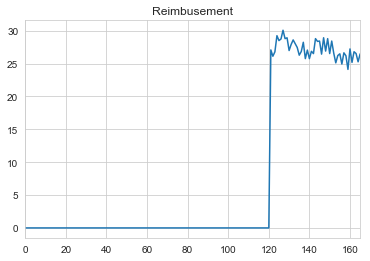

In [21]:
df['reimbursement'].plot(kind='line',title='Reimbusement')

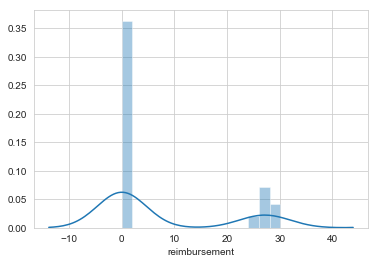

In [22]:
sns.distplot(df['reimbursement'],bins=15)

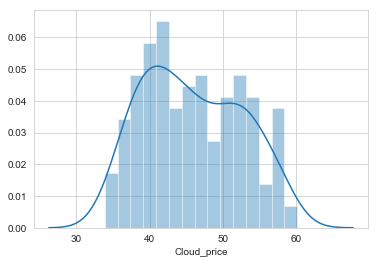

In [23]:
sns.distplot(df['Cloud_price'],bins=15)

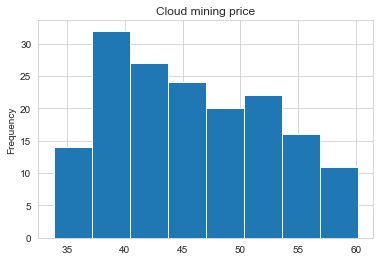

In [24]:
df['Cloud_price'].plot(kind='hist',bins=8,title='Cloud mining price')

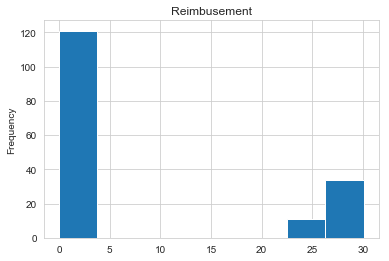

In [25]:
df['reimbursement'].plot(kind='hist',bins=8,title='Reimbusement')

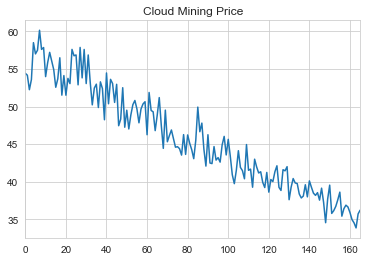

In [26]:
df['Cloud_price'].plot(kind='line',title='Cloud Mining Price')

In [27]:
#percentile list
perc = [.10,.25,.50,.75,.80,.95,.99]
include = ['object','float','int']
df.describe(percentiles=perc,include=include).style.format('{:,}')

,Btc_price,Daily_output,Revenue,Cloud_price,reimbursement
count,166.0,166.0,166.0,166.0,166.0
mean,"9,355.528012048186",1.6326488625882956e-05,0.15281382419427644,45.84414725828293,7.363236598733902
std,332.3743166174746,2.2449373614864648e-06,0.022267372543099906,6.680211762929969,12.130192978947967
min,"8,666.01",1.2756230374571436e-05,0.11283804214895403,33.85141264468621,0.0
10%,"8,950.015",1.3287739973511912e-05,0.12534133552095836,37.60240065628751,0.0
25%,"9,095.18",1.4418120630980809e-05,0.13346776554428735,40.0403296632862,0.0
50%,"9,332.310000000001",1.629652306561597e-05,0.15011741952078844,45.03522585623653,0.0
75%,"9,587.517500000002",1.84196450304e-05,0.17173330595313124,51.51999178593937,25.169602235281463
80%,"9,636.89",1.84196450304e-05,0.17655266600928463,52.96579980278539,26.447329264383367
95%,"9,915.175",1.9986594000000003e-05,0.19055353629109506,57.16606088732851,28.583030443664256


**Creat a Loop, Repete 1000 times**

In [28]:
#define a list to keep all the results from each simulation that we want to analyze
all_stats = []

#Loop through many simulations
for i in range(num_simulations):
    
    #Choose random inputs for the sales targets and percent to target
    btc_price=np.random.normal(avg,std_dtv,num_reps).round(2)
    
    #Build the dataframe based on the inputs and number of reps
    df = pd.DataFrame(data={'Btc_price':btc_price})
    
    #Back into the daily output using the formule
    daily_output_summary = []
    daily_output=0.00001938
    for day in range(166):
        if day == 4:
            daily_output  = daily_output * 1.0313
        if (day - 4) % 14 == 0 and day - 4 != 0:
            daily_output = daily_output * 0.96
        
        daily_output_summary.append(daily_output)
    
    df['Daily_output']=daily_output_summary
    
    #Determine the Revenu and Cloud_price and calculate it
    df['Revenu']=df['Btc_price']*df['Daily_output']
    df['Cloud_price']=df['Revenu']*300
    
    #Determine the Reimbusement and calculate it
    reimbursement_s = []

    for day in range(166):
        if day <= 120:
            reimbursement  = 0
        if day> 120:
            reimbursement = cloud_price[day-120]*0.6

        reimbursement_s.append(reimbursement)
    df['Reimbursement']=reimbursement_s
    
    #We want to track btc price, daily output, cloud mining price and reimbursement over all the simulations
    all_stats.append([df['Btc_price'].max().round(2),
                     df['Daily_output'].max().round(8),
                     df['Cloud_price'].min().round(2),
                     df['Revenu'].max().round(8),
                     df['Reimbursement'].max().round(8)])

In [29]:
result_df = pd.DataFrame.from_records(all_stats,columns=['Btc_price',
                                                        'Daily_output',
                                                        'Cloud_price',
                                                         'Revenu',
                                                        'Reimbursement'])

In [30]:
result_df.head()

,Btc_price,Daily_output,Cloud_price,Revenu,Reimbursement
0,10403.89,0.00002,34.62,0.199621,36.09682
1,10338.82,0.00002,34.21,0.197360,36.09682
2,10258.26,0.00002,33.20,0.194654,36.09682
3,10139.93,0.00002,34.36,0.200167,36.09682
4,10121.58,0.00002,33.47,0.202296,36.09682


In [31]:
result_df.tail()

,Btc_price,Daily_output,Cloud_price,Revenu,Reimbursement
995,10076.80,0.00002,34.82,0.197805,36.09682
996,10116.82,0.00002,34.07,0.198514,36.09682
997,10183.08,0.00002,34.74,0.191907,36.09682
998,10069.22,0.00002,34.06,0.199036,36.09682
999,10123.78,0.00002,33.81,0.201059,36.09682


In [32]:
#result_df['Reimbursement']

In [33]:
#result_df.tail()

In [34]:
result_df.describe(percentiles=perc,include=include)

,Btc_price,Daily_output,Cloud_price,Revenu,Reimbursement
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1.000000e+03
mean,10177.437160,1.999000e-05,33.967700,0.197502,3.609682e+01
std,131.574819,5.423723e-20,0.669491,0.003474,6.255905e-13
min,9846.330000,1.999000e-05,31.130000,0.188445,3.609682e+01
10%,10024.379000,1.999000e-05,33.109000,0.193360,3.609682e+01
25%,10087.545000,1.999000e-05,33.550000,0.195117,3.609682e+01
50%,10157.120000,1.999000e-05,34.000000,0.197136,3.609682e+01
75%,10258.597500,1.999000e-05,34.430000,0.199605,3.609682e+01
80%,10281.676000,1.999000e-05,34.540000,0.200261,3.609682e+01
95%,10404.894500,1.999000e-05,34.960500,0.203572,3.609682e+01


In [35]:
#result_df['Cloud_price'].plot(kind='Hist',title='Cloud Price')

In [36]:
result_df

,Btc_price,Daily_output,Cloud_price,Revenu,Reimbursement
0,10403.89,0.00002,34.62,0.199621,36.09682
1,10338.82,0.00002,34.21,0.197360,36.09682
2,10258.26,0.00002,33.20,0.194654,36.09682
3,10139.93,0.00002,34.36,0.200167,36.09682
4,10121.58,0.00002,33.47,0.202296,36.09682
5,10341.90,0.00002,34.58,0.196386,36.09682
6,10091.22,0.00002,34.16,0.194781,36.09682
7,10099.93,0.00002,32.40,0.193114,36.09682
8,10383.47,0.00002,34.27,0.194894,36.09682
9,10217.63,0.00002,33.86,0.199915,36.09682


In [37]:
#result_df.to_excel(excel_writer = r"C:\Users\ding_\Desktop\云算力结果分段1.xlsx")

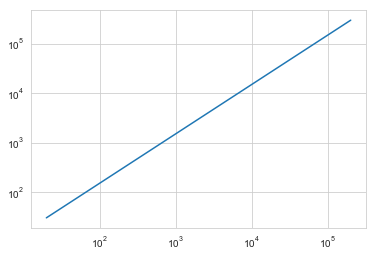

In [38]:
import matplotlib.pyplot as plt
y = [20,200,2000,20000,200000]
z = [30,300,3000,30000,300000]
plt.loglog(y,z)